# Metadata Explorer

__Description__: Opens the metadata file created by `PM-EventsTable.ipynb` or `distalEventsTable.ipynb` and explores the metadata associated with the excess rainfall calculation. 

__Input__: The metadata *.json file created by `PM-EventsTable.ipynb` or `distalEventsTable.ipynb`.

__Output__: User-specified metadata as a *.csv.

---



### Load Libraries:

In [1]:
import sys
sys.path.append('../../core')
from hydromet import*

### Specify the Filename and Path:

In [2]:
filename = 'Sacramento_P01_D30_Metadata'
path = pl.Path(os.getcwd())/'Outputs'

### Open the Metadata File and Extract Data:

---

In [3]:
with open(path/'{0}.json'.format(filename)) as f:
    metadata = json.load(f)

#### Extract the durations:

In [4]:
durations = list(metadata.keys())
print('Durations:', durations)

Durations: ['H06', 'H12', 'H24', 'H96']


#### Select a duration and extract the boundary condition names:

In [5]:
dur = durations[0] 
#dur = 'H06'

BCName = list(metadata[dur]['BCName'].keys())
print('Boundary condition names:', BCName)

Boundary condition names: ['D30']


#### Select a boundary condition name and extract the types of metadata available:

In [6]:
BCN = BCName[0]   
#BCN = 'D01'

scen = metadata[dur]['BCName'][BCN]
types = list(scen.keys())
print('Metadata types:', types)

Metadata types: ['groups', 'test_stat', 'precip', 'cum_excess', 'incr_excess', 'parameters', 'events_metadata']


#### Extract each type of metadata:

In [9]:
events_metadata = scen['events_metadata']
precip = scen['precip']
incr_excess = scen['incr_excess']
cum_excess = scen['cum_excess']
parameters = scen['parameters']
try: 
    test_stat = scen['test_stat']
except:
    print('No test statistics available')
groups = scen['groups']

### Explore Each Type of Metadata:
---
#### Events_metadata:
- The events_metadata dictionary contains the metadata associated with calculating the original excess rainfall events, including, but not limited to*, the following:
    - __TR__ : Recurrance Interval
    - __Rand Precipitation__ : The randomly selected precipitation amount
    - __Quartile__ : NOAA Atlas 14 temporal distribution quartile
    - __Decile__ : NOAA Atlas 14 decile for the specific quartile
    - __Random CN__ : The randomly selected curve number


- The 'keys' of the events_metadata dictionary are the metadata types, while the 'values' are the values for each metadata type.
- The events_metadata dictionary is transformed into a dataframe in order to explore the data more easily.
- *Contact sputnam@Dewberry.com for information about the metadata types not described above.

In [10]:
events_metadata_types = list(events_metadata.keys())
print('There are {0} types of metadata available, including {1}'.format(len(events_metadata_types), events_metadata_types))
events_metadata_df = pd.DataFrame.from_dict(events_metadata)
events_metadata_df = events_metadata_df.set_index('EventID')
events_metadata_df.head()

There are 24 types of metadata available, including ['Tr', 'Ann. Exc. Prob.', 'ARI', 'Log10_ARI', 'Expected Value', 'Lower (90%)', 'Upper (90%)', 'Quartile', 'Sigma', 'Fitted Lower (90%) Limit', 'Fitted Upper (90%) Limit', 'Random Precipitation', 'AMC I (Dry) CN', 'AMC II CN', 'AMC III (Wet) CN', 'alpha CN', 'beta CN', 'CN Lower Limit', 'Fitted AMC I (Dry) CN', 'Fitted AMC II CN', 'Fitted AMC III (Wet) CN', 'Random CN', 'Decile', 'EventID']


,Tr,Ann. Exc. Prob.,ARI,Log10_ARI,Expected Value,Lower (90%),Upper (90%),Quartile,Sigma,Fitted Lower (90%) Limit,...,AMC II CN,AMC III (Wet) CN,alpha CN,beta CN,CN Lower Limit,Fitted AMC I (Dry) CN,Fitted AMC II CN,Fitted AMC III (Wet) CN,Random CN,Decile
EventID,,,,,,,,,,,,,,,,,,,,,
E60001,2.002136,0.499467,1.444917,0.368052,1.192224,1.068518,1.343827,1,0.090378,1.061832,...,83.0,93.0,1.431967,1.931338,60.737604,66.999735,82.999805,92.999596,94,60
E60010,2.023707,0.494143,1.467350,0.383458,1.195647,1.071528,1.347758,1,0.090352,1.064917,...,83.0,93.0,1.431967,1.931338,60.737604,66.999735,82.999805,92.999596,65,30
E60100,2.325092,0.430091,1.778480,0.575759,1.239207,1.109817,1.397796,1,0.090881,1.102966,...,83.0,93.0,1.431967,1.931338,60.737604,66.999735,82.999805,92.999596,76,90
E61000,2.363677,0.423070,1.818071,0.597776,1.244295,1.114287,1.403642,2,0.091009,1.107312,...,83.0,93.0,1.431967,1.931338,60.737604,66.999735,82.999805,92.999596,72,70
E61001,2.364079,0.422998,1.818482,0.598002,1.244347,1.114333,1.403702,2,0.090942,1.107454,...,83.0,93.0,1.431967,1.931338,60.737604,66.999735,82.999805,92.999596,76,60


---
#### __Precip__:
- The precip dictionary contains the cumulative precipitation data for each of the original events.
- The 'keys' of the precip dictionary are the original event IDs, while the 'values' are dictionaries containing the index and cumulative precipitation for each event.
- The precip dictionary is transformed into a dataframe in order to explore the data more easily.

,E60001,E60002,E60003,E60004,E60005,E60006,E60007,E60008,E60009,E60010,...,E64913,E64914,E64915,E64916,E64917,E64918,E64919,E64920,E64921,E64922
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,0.125254,0.111485,0.147543,0.142078,0.179377,0.114856,0.127471,0.224187,0.110142,0.189326,...,0.274255,0.254547,0.169558,0.208358,0.253764,0.220281,0.153388,0.234245,0.111388,0.145615
1.0,0.251051,0.252864,0.295726,0.284048,0.351110,0.260510,0.267664,0.438819,0.231276,0.389402,...,0.545009,0.505845,0.342000,0.419484,0.504289,0.444308,0.308814,0.458284,0.220876,0.284886
1.5,0.371739,0.379101,0.437890,0.411159,0.498940,0.390563,0.399938,0.623578,0.345568,0.566770,...,0.844940,0.784222,0.538376,0.661054,0.781810,0.699429,0.486652,0.735781,0.335305,0.457388
2.0,0.478618,0.487583,0.563789,0.517744,0.613285,0.502325,0.515337,0.766486,0.445279,0.708664,...,1.146037,1.063682,0.746864,0.927136,1.060410,0.970284,0.682535,1.054101,0.480528,0.655267


None


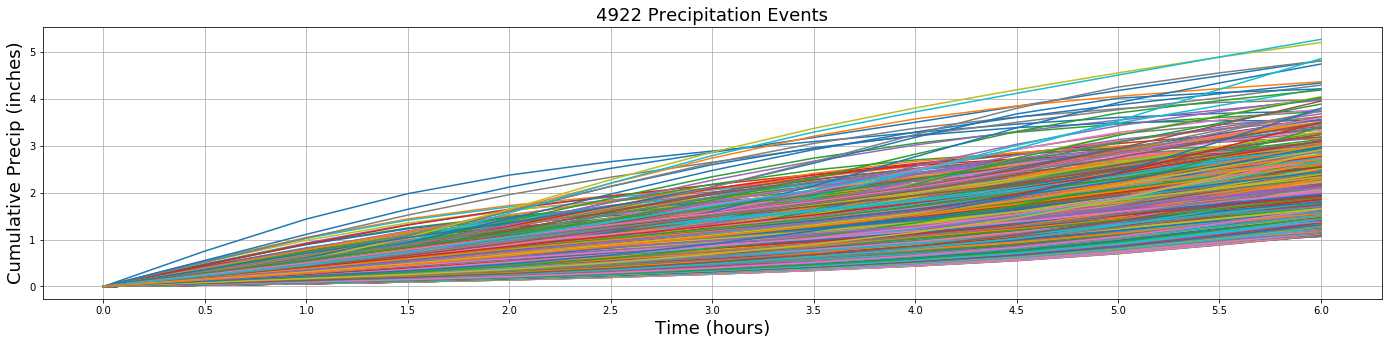

In [11]:
precip_df = pd.DataFrame.from_dict(precip)

print(display(precip_df.head()))

plot_cum_precip_or_excess(precip_df)

---
#### __Cum_excess__:
- The cum_excess dictionary contains the cumulative excess rainfall data for each of the original events.
- The 'keys' of the cum_excess dictionary are the original event IDs, while the 'values' are dictionaries containing the index and cumulative excess rainfall for each event.
- The cum_excess dictionary is transformed into a dataframe in order to explore the data more easily.

,E60001,E60002,E60003,E60004,E60005,E60006,E60007,E60008,E60009,E60010,...,E64913,E64914,E64915,E64916,E64917,E64918,E64919,E64920,E64921,E64922
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
0.5,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000871,0.0,0.000000,0.000000,0.0,0.000000
1.0,0.019989,0.032328,0.000000,0.000000,0.000000,0.000000,0.000334,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.057108,0.0,0.011203,0.000000,0.0,0.000000
1.5,0.067516,0.093716,0.011836,0.001859,0.000000,0.000000,0.016801,0.000000,0.0,0.0,...,0.018944,0.0,0.0,0.000000,0.187429,0.0,0.065292,0.006127,0.0,0.005836
2.0,0.124509,0.160866,0.039900,0.014076,0.004911,0.001774,0.047804,0.001137,0.0,0.0,...,0.085133,0.0,0.0,0.002897,0.360416,0.0,0.159435,0.060567,0.0,0.044218


None


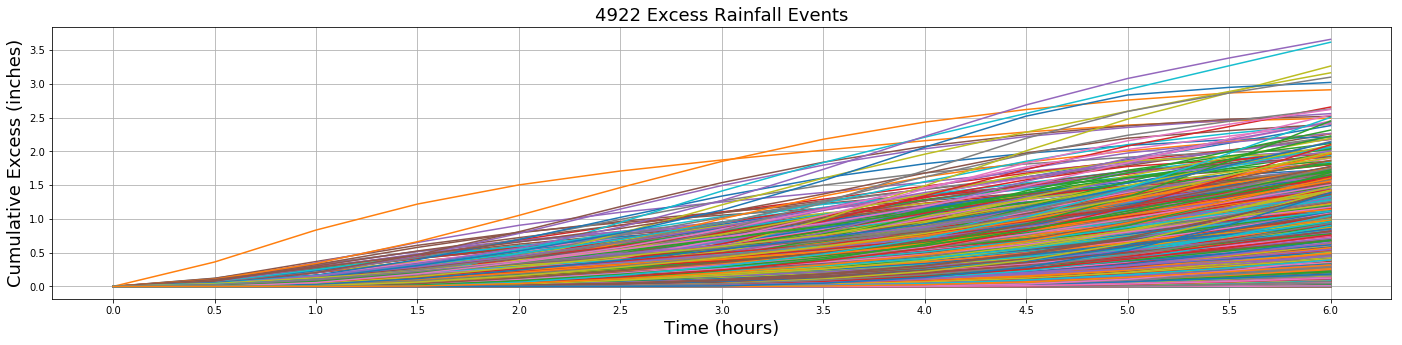

In [12]:
cum_excess_df = pd.DataFrame.from_dict(cum_excess)

print(display(cum_excess_df.head()))

plot_cum_precip_or_excess(cum_excess_df, 'Excess')

---
#### __Incr_excess__:
- The incr_excess dictionary contains the incremental excess rainfall data for each of the original events.
- The 'keys' of the incr_excess dictionary are the original event IDs, while the 'values' are dictionaries containing the index and incremental excess rainfall for each event.
- The incr_excess dictionary is transformed into a dataframe in order to explore the data more easily.

,E60001,E60002,E60003,E60004,E60005,E60006,E60007,E60008,E60009,E60010,...,E64913,E64914,E64915,E64916,E64917,E64918,E64919,E64920,E64921,E64922
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,0.009973,0.000073,0.003988,0.000642,0.001436,0.000406,0.000159,0.000333,0.000033,0.000151,...,0.006149,0.001290,0.000378,0.000651,0.000871,0.001443,0.005565,0.001951,0.000893,0.001858
1.0,0.010016,0.032255,0.004005,0.000642,0.001375,0.000514,0.000175,0.000318,0.000036,0.000159,...,0.006070,0.001274,0.000384,0.000660,0.056237,0.001468,0.005639,0.001866,0.000878,0.001777
1.5,0.047527,0.061388,0.003843,0.000575,0.001184,0.000459,0.016467,0.000274,0.000034,0.000141,...,0.006725,0.001411,0.000437,0.000755,0.130321,0.001672,0.054089,0.002311,0.000918,0.002201
2.0,0.056993,0.067150,0.028064,0.012217,0.000916,0.000395,0.031003,0.000212,0.000029,0.000113,...,0.066189,0.001416,0.000464,0.000831,0.172987,0.001775,0.094143,0.054440,0.001164,0.038382


None


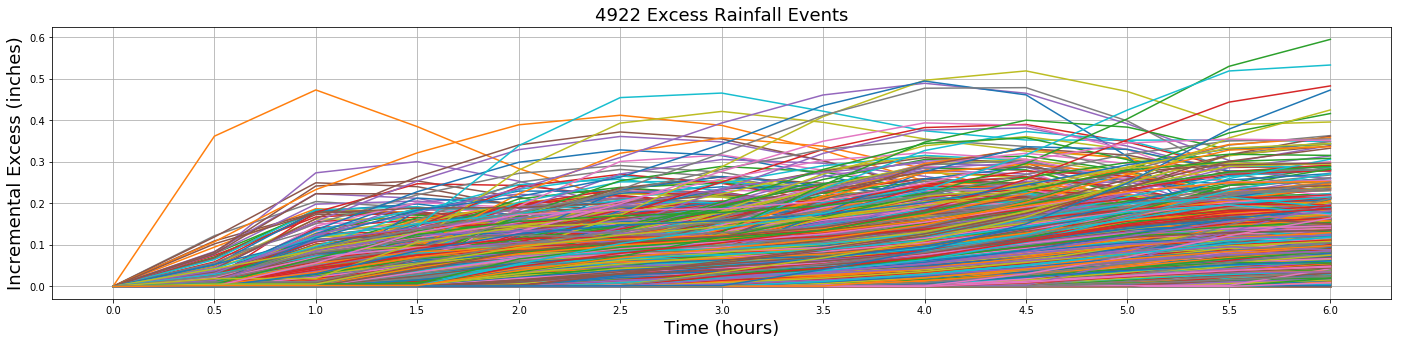

In [13]:
incr_excess_df = pd.DataFrame.from_dict(incr_excess)

print(display(incr_excess_df.head()))

plot_incr_excess(incr_excess_df)

---
#### Parameters:
- The parameters dictionary contains the random number generator seed and the convolution parameters used in grouping the individual excess rainfall events.

In [14]:
seed = parameters['seed']
tempEpsilon = parameters['tempEpsilon']
tempEpsilon2 = parameters['tempEpsilon2']
convEpsilon = parameters['convEpsilon']
volEpsilon = parameters['volEpsilon']

print('Seed: {0}\nConvolution parameters: tempEpsilon: {1} hours, tempEpsilon2: {2} hours, ' 
      'convEpsilon: {3}, volEpsilon: {4}'.format(seed, tempEpsilon, tempEpsilon2, convEpsilon, volEpsilon))

Seed: 608
Convolution parameters: tempEpsilon: 1 hours, tempEpsilon2: 0.5 hours, convEpsilon: 150, volEpsilon: 66.67


---
#### __Groups__:
- The groups dictionary contains the IDs of the individual excess rainfall events that were grouped in order to form the final/mean events. 
- The 'keys' of the groups dictionary are the final event IDs, while the 'values' are the original event IDs.

In [16]:
final_events = list(groups.keys())
n_final_events = len(final_events)

print('There are {0} final/mean events for the {1} duration and the {2} boundary condition, including '.format(n_final_events, dur, BCN))
if n_final_events>20:
    print(final_events[:20],'...')
else:
    print(final_events)

There are 240 final/mean events for the H06 duration and the D30 boundary condition, including 
['E0001', 'E0002', 'E0003', 'E0004', 'E0005', 'E0006', 'E0007', 'E0008', 'E0009', 'E0010', 'E0011', 'E0012', 'E0013', 'E0014', 'E0015', 'E0016', 'E0017', 'E0018', 'E0019', 'E0020'] ...


##### Select a specific final event and extract the original event IDs:

In [17]:
final_event = final_events[0] 
#final_event = 'E0001'
original_events = list(groups[final_event])
n_original_events = len(original_events)

print('{0} is the average of {1} individual excess rainfall events, including:'.format(final_event, n_original_events))    
if n_original_events>20:
    print(original_events[:20],'...')
else:
    print(original_events)

E0001 is the average of 236 individual excess rainfall events, including:
['E62367', 'E62760', 'E62827', 'E63149', 'E63189', 'E63276', 'E62959', 'E63315', 'E62216', 'E62256', 'E62163', 'E62689', 'E62444', 'E63446', 'E62611', 'E62918', 'E64558', 'E64561', 'E63940', 'E64685'] ...


---
#### __Test_stat__:
- The test_stat dictionary contains the final value of the test statistic for each individual excess rainfall event and its corresponding final/mean event. This test statistic is a quantatiative measure of the similarity between the original excess rainfall curve and the final/mean excess rainfall curve. See the `Convolution_Parameters.ipynb` for additional details about interpreting the test statistic values. 
- The 'keys' of the test_stat dictionary are the final event IDs, while the 'values' are the test statistics for the individual excess rainfall events that were grouped in order to form the final/mean event.
- The test statistics for the final event specified above are shown below. 

In [19]:
if 'test_stat' in locals(): 
    event_test_stats = list(test_stat[final_event])
    max_test_stat = max(event_test_stats)
    min_test_stat = min(event_test_stats)

    print('For final event: {0} the maximum test statistic is {1}, while the minimum is {2}.'.format(final_event, max_test_stat, min_test_stat))   

For final event: E0001 the maximum test statistic is 0.773544, while the minimum is -0.335859.


---
### Save select data to csv:

#### From a dataframe (events_metadata_df, precip_df, incr_excess_df, cum_excess_df):
- Specify the type of metadata to be saved (the type of metadata will be appended to the original metadata filename when saved as a .csv).
- Specify the corresponding dataframe to save by typing the dataframe name in front of '.to_csv'. 
- Execute the cell (shift+enter).

In [20]:
metadata_type = 'Events_Metadata'

events_metadata_df.to_csv(path/'{0}_{1}.csv'.format(filename, metadata_type))

#### From a dictionary (parameters, groups, test_stat):
- Specify the type of metadata to be saved (the type of metadata will be appended to the original metadata filename when saved as a .csv).
- Specify the corresponding dataframe to save by typing the dataframe name in the function 'dict_to_df.
- Execute the cell (shift+enter).

In [21]:
metadata_type = 'groups'

df = dict_to_df(groups, display_head=True)

df.to_csv(path/'{0}_{1}.csv'.format(filename, metadata_type))        

,E0001,E0002,E0003,E0004,E0005,E0006,E0007,E0008,E0009,E0010,...,E0231,E0232,E0233,E0234,E0235,E0236,E0237,E0238,E0239,E0240
0,E62367,E60135,E60919,E62879,E62213,E60854,E62800,E61457,E63298,E60983,...,E61710,E61994,E63687,E62124,E62133,E62131,E63727,E61950,E63841,E63859
1,E62760,E60261,E61200,E63193,E63313,E61709,E63626,E61560,E63518,E61023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E62827,E60383,E61704,E63020,E62192,E61061,E62635,E60993,E62499,E60961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E63149,E60721,E61777,E63405,E62403,E61609,E63407,E61763,E62613,E61473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E63189,E61180,E61187,E62310,E63121,E60852,E63527,E61949,E63205,E61484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None


---
# End